In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [47]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [48]:
##yaha par target variable chance of admit column hai
##linear regression lagaenge kyoki binary attributes hai 0 and 1
##data have classes for target variable, it means problem is classification
##generally target variable last me rakha jata hai par aisa koi rule nhi hai ki last me hi hota hai



In [49]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [50]:
df.shape

(400, 9)

In [51]:
df.Research.unique()

array([1, 0], dtype=int64)

In [52]:
df['Research']=df['Research'].astype('object')

In [53]:
df=df.drop('Serial No.', axis =1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [54]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [55]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.686138
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.672465
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.638983
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.612152
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.557481
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.737307
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.519441
Chance of Admit,0.686138,0.672465,0.638983,0.612152,0.557481,0.737307,0.519441,1.000000


Text(0.5, 1.0, 'HeatMap')

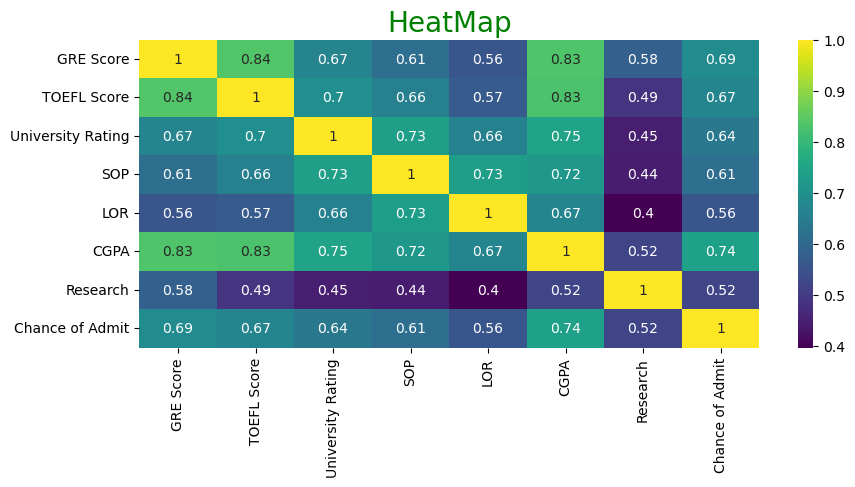

In [56]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot= True, cmap='viridis')
plt.title('HeatMap', fontsize=(20), color='green')
##annot numerical values dikha deta h heatmap me
##cmap color change krta h graph ka

<Axes: >

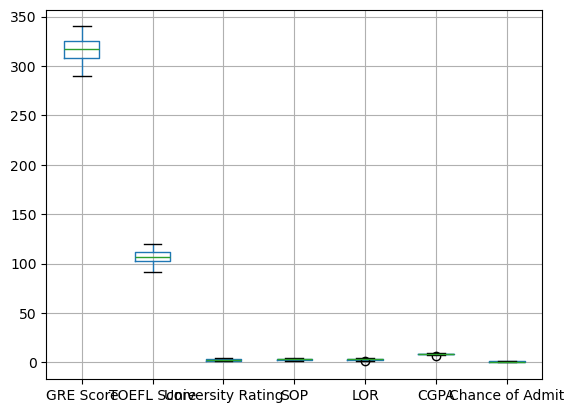

In [57]:
df.boxplot()


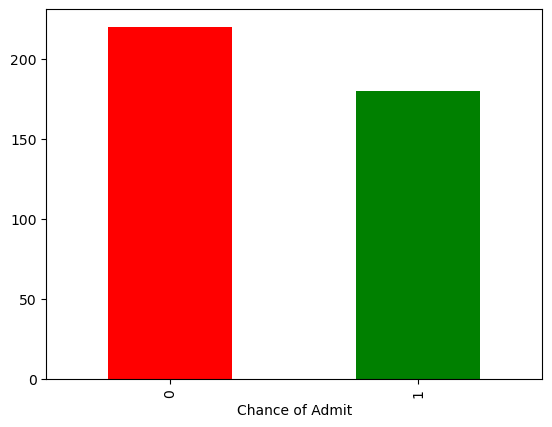

In [58]:
df['Chance of Admit'].value_counts().plot(kind='bar', color = ['Red','Green'])
plt.show()

In [59]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [60]:
x= df.drop('Chance of Admit',axis=1)
y = df['Chance of Admit']

In [61]:
df_scaled=StandardScaler().fit_transform(x)
df_scaled= pd.DataFrame(data=df_scaled, columns=x.columns)
df_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [62]:
X=df_scaled
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


# Train test Split

In [63]:
x_train,x_test, y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 7)
(120, 7)
(280,)
(120,)


# Model Building

In [64]:
model= sm.Logit(y_train,x_train).fit()
model

Optimization terminated successfully.
         Current function value: 0.234857
         Iterations 8


In [65]:
model= sm.Logit(y_train,x_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.234857
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      273
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Jun 2025   Pseudo R-squ.:                  0.6597
Time:                        16:01:57   Log-Likelihood:                -65.760
converged:                       True   LL-Null:                       -193.22
Covariance Type:            nonrobust   LLR p-value:                 3.656e-52
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             1.2061      0.502      2.402      0.016       0.222       2.190
TOEFL Score           0.0899      0.421      0.213      0.831      -0.736       0.916
University Rating     0.8461      0.408      2.076      0.038       0.047       1.645
SOP                   0.0850      0.382      0.223      0.824      -0.663       0.833
LOR                   0.6802      0.332      2.050      0.040       0.030       1.330
CGPA                  2.3128      0.554      4.174      0.000       1.227       3.399
Research              0.1297      0.247      0.526      0.599      -0.353       0.613
=====================================================================================
"""

In [66]:
y_pred= model.predict(x_test)
y_pred

332    0.042343
111    0.884858
352    0.012850
205    0.000568
56     0.004111
         ...   
17     0.086656
225    0.001888
223    0.114173
59     0.018160
114    0.181419
Length: 120, dtype: float64

In [1]:
##prunning definition learn
#hyperparameters
#gridsearch method


In [2]:
###for installing any library
! pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=7e7e2825e84ff42ca68b45c2ace4d9db4f1e674ce11beeeb882dbf354cb11fd2
  Stored in directory: c:\users\bhoomi gupta\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus
